There are 3 images in current directory named as:  ['Person', 'Greenary', 'My']
Select Pic: Myk
Enter valid Name: My

3D Image Dimensions:  (238, 211, 3)

2D Image Dimensions:  (50218, 3)

2D Image: 
 [[255 252 209]
 [255 252 209]
 [254 251 208]
 ...
 [200 207 253]
 [139 146 192]
 [147 154 200]]

For K =  2  Iteration No:  1

Centroids: 
 [[212  38  27]
 [ 51 185 129]]

Updated Centroids: 
 [[ 91  61  43]
 [172 167 155]]

For K =  2  Iteration No:  2

Centroids: 
 [[ 91  61  43]
 [172 167 155]]

Updated Centroids: 
 [[ 81  58  46]
 [180 171 155]]

For K =  2  Iteration No:  3

Centroids: 
 [[ 81  58  46]
 [180 171 155]]

Updated Centroids: 
 [[ 81  59  48]
 [181 171 155]]

For K =  2  Iteration No:  4

Centroids: 
 [[ 81  59  48]
 [181 171 155]]

Updated Centroids: 
 [[ 81  59  48]
 [181 171 155]]

Total Iterations for K =  2  are:  5

For K =  3  Iteration No:  1

Centroids: 
 [[ 57   0 148]
 [ 56 227 145]
 [192 186 217]]

Updated Centroids: 
 [[ 80  59  50]
 [116 132 131]
 [189 175 1


Updated Centroids: 
 [[101  65  44]
 [ 31  24  20]
 [222  23 207]
 [156  15 245]
 [134  96  75]
 [195 178 151]
 [161 141 114]
 [139 171 220]
 [245 239 209]
 [ 83 110 156]]

For K =  10  Iteration No:  18

Centroids: 
 [[101  65  44]
 [ 31  24  20]
 [222  23 207]
 [156  15 245]
 [134  96  75]
 [195 178 151]
 [161 141 114]
 [139 171 220]
 [245 239 209]
 [ 83 110 156]]

Updated Centroids: 
 [[100  65  44]
 [ 31  24  20]
 [222  23 207]
 [156  15 245]
 [134  95  75]
 [195 178 151]
 [161 141 114]
 [139 171 220]
 [245 239 209]
 [ 83 110 156]]

For K =  10  Iteration No:  19

Centroids: 
 [[100  65  44]
 [ 31  24  20]
 [222  23 207]
 [156  15 245]
 [134  95  75]
 [195 178 151]
 [161 141 114]
 [139 171 220]
 [245 239 209]
 [ 83 110 156]]

Updated Centroids: 
 [[100  65  43]
 [ 31  24  20]
 [222  23 207]
 [156  15 245]
 [134  95  75]
 [195 178 151]
 [161 141 114]
 [139 171 220]
 [245 239 209]
 [ 83 110 156]]

For K =  10  Iteration No:  20

Centroids: 
 [[100  65  43]
 [ 31  24  20]
 [222  23 2

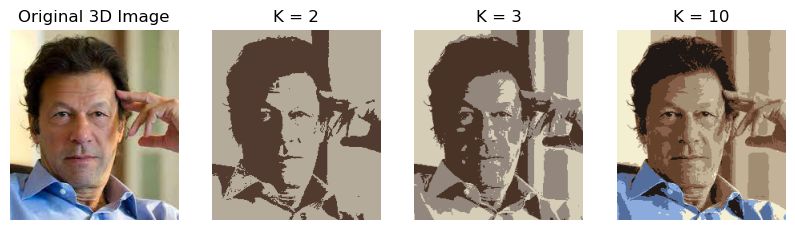

Want to Estimate Elbow Point (Optimal Value of K). Press Y for Yes or N for Not: N


In [23]:
from PIL import Image                          # for images
import copy                                    # help in deep copy
import random                                  # help in to generate randon numbers
import numpy as np                             # help in matrices related operations                      
import matplotlib.pyplot as plt                # help in ploting and visuaization
%matplotlib inline


# Selection of Pic
Pics = ['Person' , 'Greenary' , 'My']
print ('There are 3 images in current directory named as: ' , Pics)
Img_Name = input('Select Pic: ')
while (Img_Name not in Pics):
    Img_Name = input('Enter valid Name: ')    


# Load and Converting 3D Image in 2D Image
Img = Image.open(Img_Name + '.jpg')
Img = np.array(Img , dtype=np.uint8)
Original_Rows = Img.shape[0]
Original_Cols = Img.shape[1]
Original_Img = copy.deepcopy(Img)
Img = Img.reshape((-1,3))
print ('\n3D Image Dimensions: ' , Original_Img.shape)
print ('\n2D Image Dimensions: ' , Img.shape)
print ('\n2D Image: \n' , Img)


# Array for K values
K_Values = np.array([2 , 3 , 10])

# For plotting Images
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
i = 0
axes[i].imshow(Original_Img)
axes[i].set_title('Original 3D Image')
axes[i].set_axis_off()

# This loop for specific values of K
for k in K_Values:
    
    # Random Initialization of Centroids
    Lower_Limit = 0
    Upper_Limit = 255
    Centroids = np.random.randint(Lower_Limit , Upper_Limit + 1 , size = (k , Img.shape[1]) , dtype=np.uint8)
    Updated_Centroids = copy.deepcopy(Centroids)
    flag = True
    Iteration = 1

    # This loop will find Converged Centriods for given value of K
    while (not(np.array_equal(Centroids , Updated_Centroids)) or flag):

        flag = False
        print ('\nFor K = ' , k , ' Iteration No: ' , Iteration)
        Iteration += 1

        # Copy Centroids
        Centroids = copy.deepcopy(Updated_Centroids)
        print ('\nCentroids: \n' , Centroids)

        # Update Centroids
        Updated_Centroids = Update_Centroids(Img , Centroids)        
        print ('\nUpdated Centroids: \n' , Updated_Centroids)
         
    print ('\nTotal Iterations for K = ' , k , ' are: ' , Iteration)
    
    # This function modify 3D Image according to given value of K
    Modify_Image(Img , Updated_Centroids)
    Img = Img.reshape(Original_Rows , Original_Cols , 3)
    
    # Store every Modified Image
    i += 1
    axes[i].imshow(Img)
    axes[i].set_title('K = ' + str(k))
    axes[i].set_axis_off()
    Img = copy.deepcopy(Original_Img)
    Img = Img.reshape((-1,3))

plt.show()

# For Finding Elbow Point

Responses = ['Y' , 'N']
Response = input('Want to Estimate Elbow Point (Optimal Value of K). Press Y for Yes or N for Not: ')
while (Response not in Responses):
    Response = input('Enter valid value: ')    

if Response == 'Y':
    while True:
        K_Max = input("Enter K Maximum Value: ")
        try:
            K_Max = int(K_Max)
            break  
        except ValueError:
            print("Invalid input. Please enter a valid integer.")

    Img = copy.deepcopy(Original_Img)
    Img = Img.reshape((-1,3))
    # Estimation about Elbow Point 
    Estimation_of_Elbow_Point(Img , K_Max)

In [16]:
def Compute_Degree_of_Membership(Img , Centroids):  
    Computation = np.zeros((Img.shape[0] , Centroids.shape[0]) , dtype=np.uint8)
    index = 0
    while (index < Img.shape[0]):
        Computation[index][np.abs(Centroids.astype(np.int16) - Img[index].astype(np.int16)).sum(axis=1).argmin()] = 1
        index += 1
    return Computation    

In [15]:
def Modify_Image(Img , Centroids):  
    index = 0
    while (index < Img.shape[0]):
        Img[index] = Centroids[np.abs(Centroids.astype(np.int16) - Img[index].astype(np.int16)).sum(axis=1).argmin()]
        index += 1

In [14]:
def Calculate_Inertia(Img , Centroids): 
    k = Centroids.shape[0]
    # Compute degree of membership
    Membership = Compute_Degree_of_Membership(Img , Centroids)
    Inertia = 0
    index = 0
    while (index < k):
        Cluster  = Membership[:,index]  
        Sum_of_Squared_Distances = ((Centroids[index].astype(np.int16) - Img[Cluster == 1].astype(np.int16))**2).sum()
        Inertia = Inertia + Sum_of_Squared_Distances
        index += 1
    return Inertia

In [13]:
def Update_Centroids(Img , Centroids):
    
    k = Centroids.shape[0]
    # Compute degree of membership
    Membership = Compute_Degree_of_Membership(Img , Centroids)
    
    Updated_Centroids = copy.deepcopy(Centroids)
    index = 0
    while (index < k):
        Cluster  = Membership[:,index]  
        if (Cluster.sum() != 0):
            Updated_Centroids[index] = np.floor_divide(Img[Cluster == 1].sum(axis=0) , Cluster.sum())
        else:
            Updated_Centroids[index] = Centroids[index]
        index += 1
    return Updated_Centroids

In [12]:
def Estimation_of_Elbow_Point(Img , K_Max):
    # Select range for K values
    K_Values = range(1 , K_Max + 1)
    Inertia_Values = []
    for k in K_Values:

        # Random Initialization of Centroids
        Lower_Limit = 0
        Upper_Limit = 255
        Centroids = np.random.randint(Lower_Limit , Upper_Limit + 1 , size = (k , Img.shape[1]) , dtype=np.uint8)
        Updated_Centroids = copy.deepcopy(Centroids)
        flag = True
        Iteration = 1

        # This loop will find Converged Centriods for given value of K
        while (not(np.array_equal(Centroids , Updated_Centroids)) or flag):

            flag = False
            print ('\nFor K = ' , k , ' Iteration No: ' , Iteration)
            Iteration += 1
            
            # Copy Centroids
            Centroids = copy.deepcopy(Updated_Centroids)
            print ('\nCentroids: \n' , Centroids)
            
            # Update Centroids
            Updated_Centroids = Update_Centroids(Img , Centroids)
            print ('\nUpdated Centroids: \n' , Updated_Centroids)

        print ('\nTotal Iterations for K = ' , k , ' are: ' , Iteration)
        
        # This function calculate Inertia for given value of K
        Inertia_Values.append(Calculate_Inertia(Img , Updated_Centroids))

    # For ploting Inertia values vs K to identify Elbow Point
    plt.plot(K_Values, Inertia_Values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Distances (Inertia)')

    plt.show()